In [1]:
import os
import sys
import glob
import yaml
import pickle
import random

import numpy as np
import pandas as pd
import scipy.stats as stats
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler, LabelEncoder

import json
from PIL import Image
import wandb
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim

import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks import EarlyStopping
from pytorch_lightning.utilities.seed import seed_everything

## config

In [2]:
# config
with open('config.yaml') as f:
    config = yaml.safe_load(f)

# globals variable
SEED = config['globals']['seed']
MAX_EPOCHS = config['globals']['max_epochs']
N_SPLITS = config['globals']['n_splits']
USE_FOLDS = config['globals']['use_folds']
DEBUG = config['globals']['debug']
EXP_MESSAGE = config['globals']['exp_message']
NOTES = config['globals']['notes']
MODEL_SAVE = config['globals']['model_save']
ONLY_PRED = config['globals']['only_pred']
PRETRAINED = config['globals']['pretrained']
PRETRAINED_PATH = config['globals']['pretrained_path']
EXP_NAME = str(Path().resolve()).split('/')[-1]

# seed
seed_everything(SEED)

Global seed set to 1996


1996

In [3]:
EXP_NAME

'exp108'

## subの用意

In [6]:
base_sub = pd.read_csv('../exp090/exp090_cost_snap_sub.csv')
rnn_sub = pd.read_csv('../exp103/exp103_cost_snap_sub.csv')

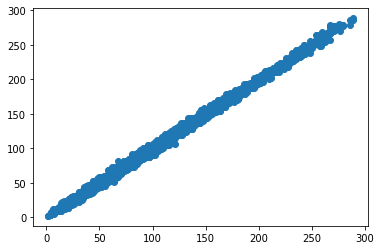

In [9]:
x = base_sub['x']
y = base_sub['y']
_x = rnn_sub['x']
_y = rnn_sub['y']
plt.scatter(x, _x)

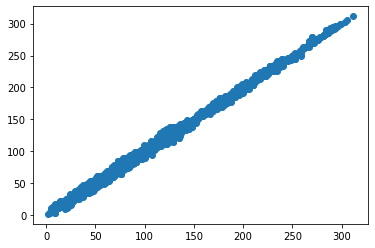

In [11]:
plt.scatter(y, _y)

In [14]:
sub = base_sub.copy()
sub['x'] = base_sub['x'] * 0.7 + rnn_sub['x'] * 0.3
sub['y'] = base_sub['y'] * 0.7 + rnn_sub['y'] * 0.3
sub

site_path_timestamp  floor           x  \
0      5a0546857ecc773753327266_046cfa46be49fc1083481...      0   93.728470   
1      5a0546857ecc773753327266_046cfa46be49fc1083481...      0   85.360190   
2      5a0546857ecc773753327266_046cfa46be49fc1083481...      0   87.162830   
3      5a0546857ecc773753327266_046cfa46be49fc1083481...      0   88.779945   
4      5a0546857ecc773753327266_046cfa46be49fc1083481...      0   89.695300   
...                                                  ...    ...         ...   
10128  5dc8cea7659e181adb076a3f_fd64de8c4a2fc5ebb0e9f...      5  205.596040   
10129  5dc8cea7659e181adb076a3f_fd64de8c4a2fc5ebb0e9f...      5  203.480969   
10130  5dc8cea7659e181adb076a3f_fd64de8c4a2fc5ebb0e9f...      5  201.819690   
10131  5dc8cea7659e181adb076a3f_fd64de8c4a2fc5ebb0e9f...      5  195.825880   
10132  5dc8cea7659e181adb076a3f_fd64de8c4a2fc5ebb0e9f...      5  192.553130   

                y  
0       97.948860  
1       99.075780  
2      104.450550  
3      108.933240  
4      111.917800  
...           ...  
10128   98.605774  
10129  100.374290  
10130  104.936270  
10131  109.711815  
10132  111.863014  

[10133 rows x 4 columns]

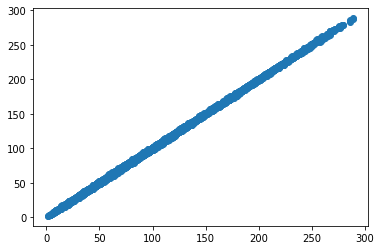

In [15]:
x_ = sub['x']
y_ = sub['y']
plt.scatter(x, x_)

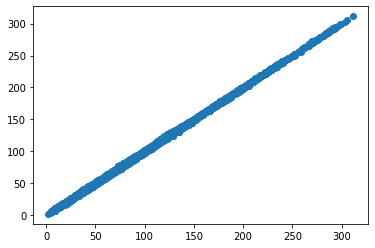

In [16]:
plt.scatter(y, y_)

In [18]:
sub.to_csv(EXP_NAME + '_ensemble_base7_rnn3.csv', index=False)